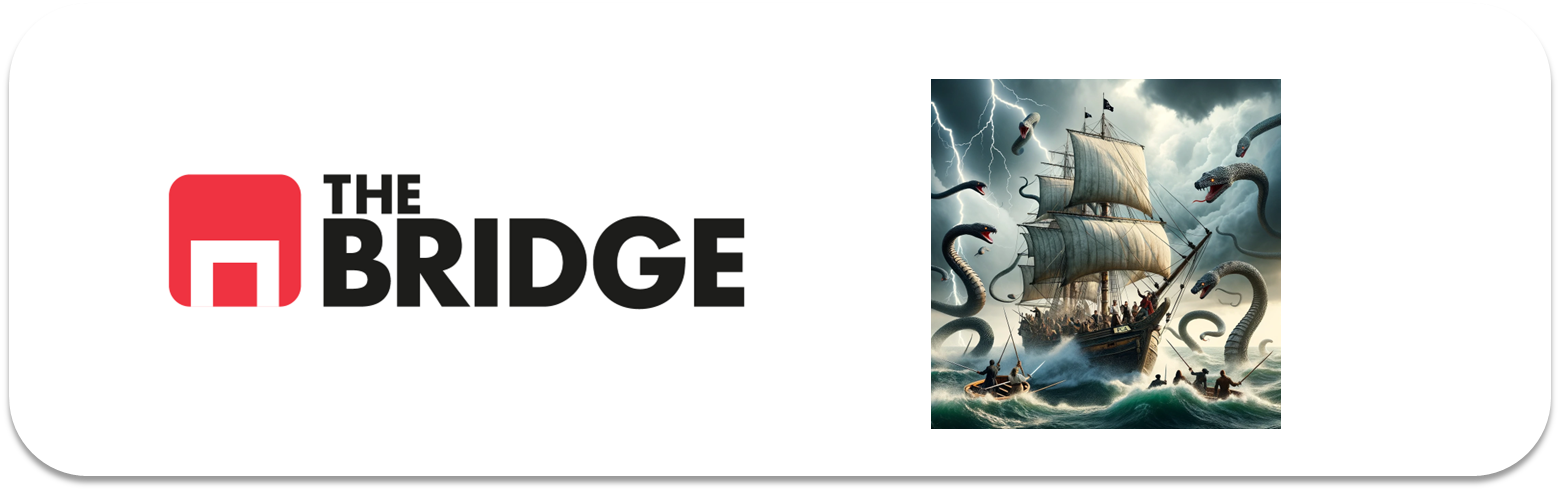

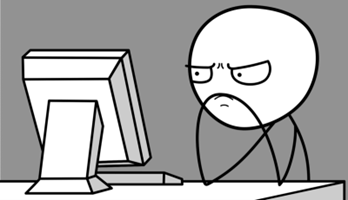

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [96]:
df = pd.read_csv("./data/nutrition.csv")


In [97]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [99]:
df.drop(columns='ID', inplace= True)

### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

In [100]:
features_num = df.select_dtypes(include='number').columns.tolist()
features_cat = [col for col in df if col not in features_num]

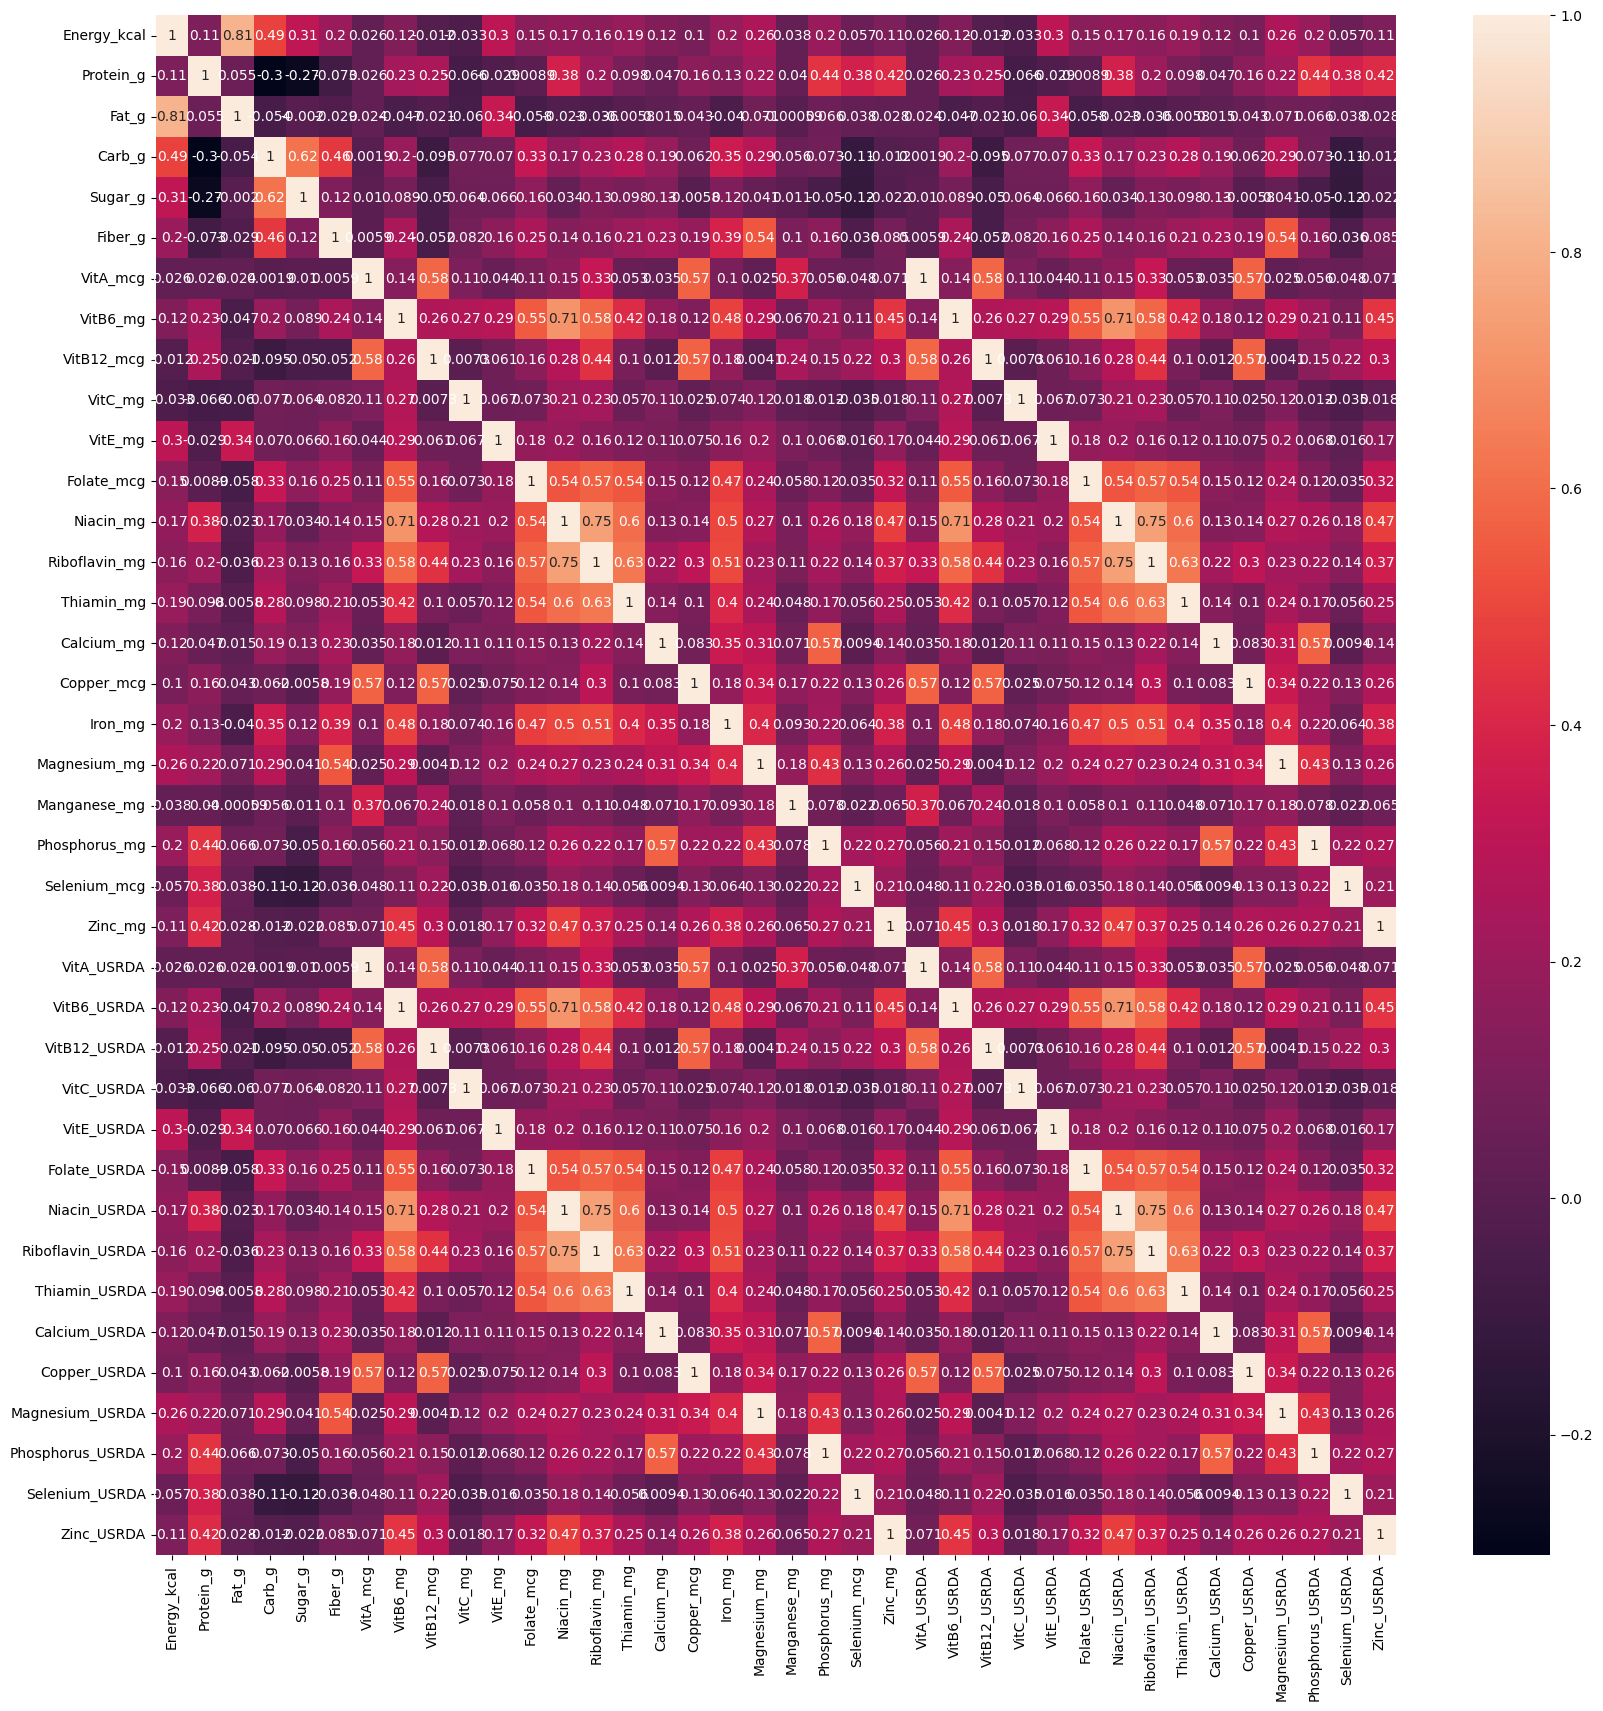

In [101]:
# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize= (20, 20))
sns.heatmap(df.corr(numeric_only= True), annot= True);

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [102]:
#Eliminamos las features que contienen USRDA
df.drop(columns= df.columns[df.columns.str.contains('USRDA')], inplace= True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FoodGroup       8618 non-null   object 
 1   ShortDescrip    8618 non-null   object 
 2   Descrip         8618 non-null   object 
 3   CommonName      1063 non-null   object 
 4   MfgName         1560 non-null   object 
 5   ScientificName  732 non-null    object 
 6   Energy_kcal     8618 non-null   float64
 7   Protein_g       8618 non-null   float64
 8   Fat_g           8618 non-null   float64
 9   Carb_g          8618 non-null   float64
 10  Sugar_g         8618 non-null   float64
 11  Fiber_g         8618 non-null   float64
 12  VitA_mcg        8618 non-null   float64
 13  VitB6_mg        8618 non-null   float64
 14  VitB12_mcg      8618 non-null   float64
 15  VitC_mg         8618 non-null   float64
 16  VitE_mg         8618 non-null   float64
 17  Folate_mcg      8618 non-null   f

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [104]:
df = df.select_dtypes(exclude= ['object'])

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


In [105]:
df.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


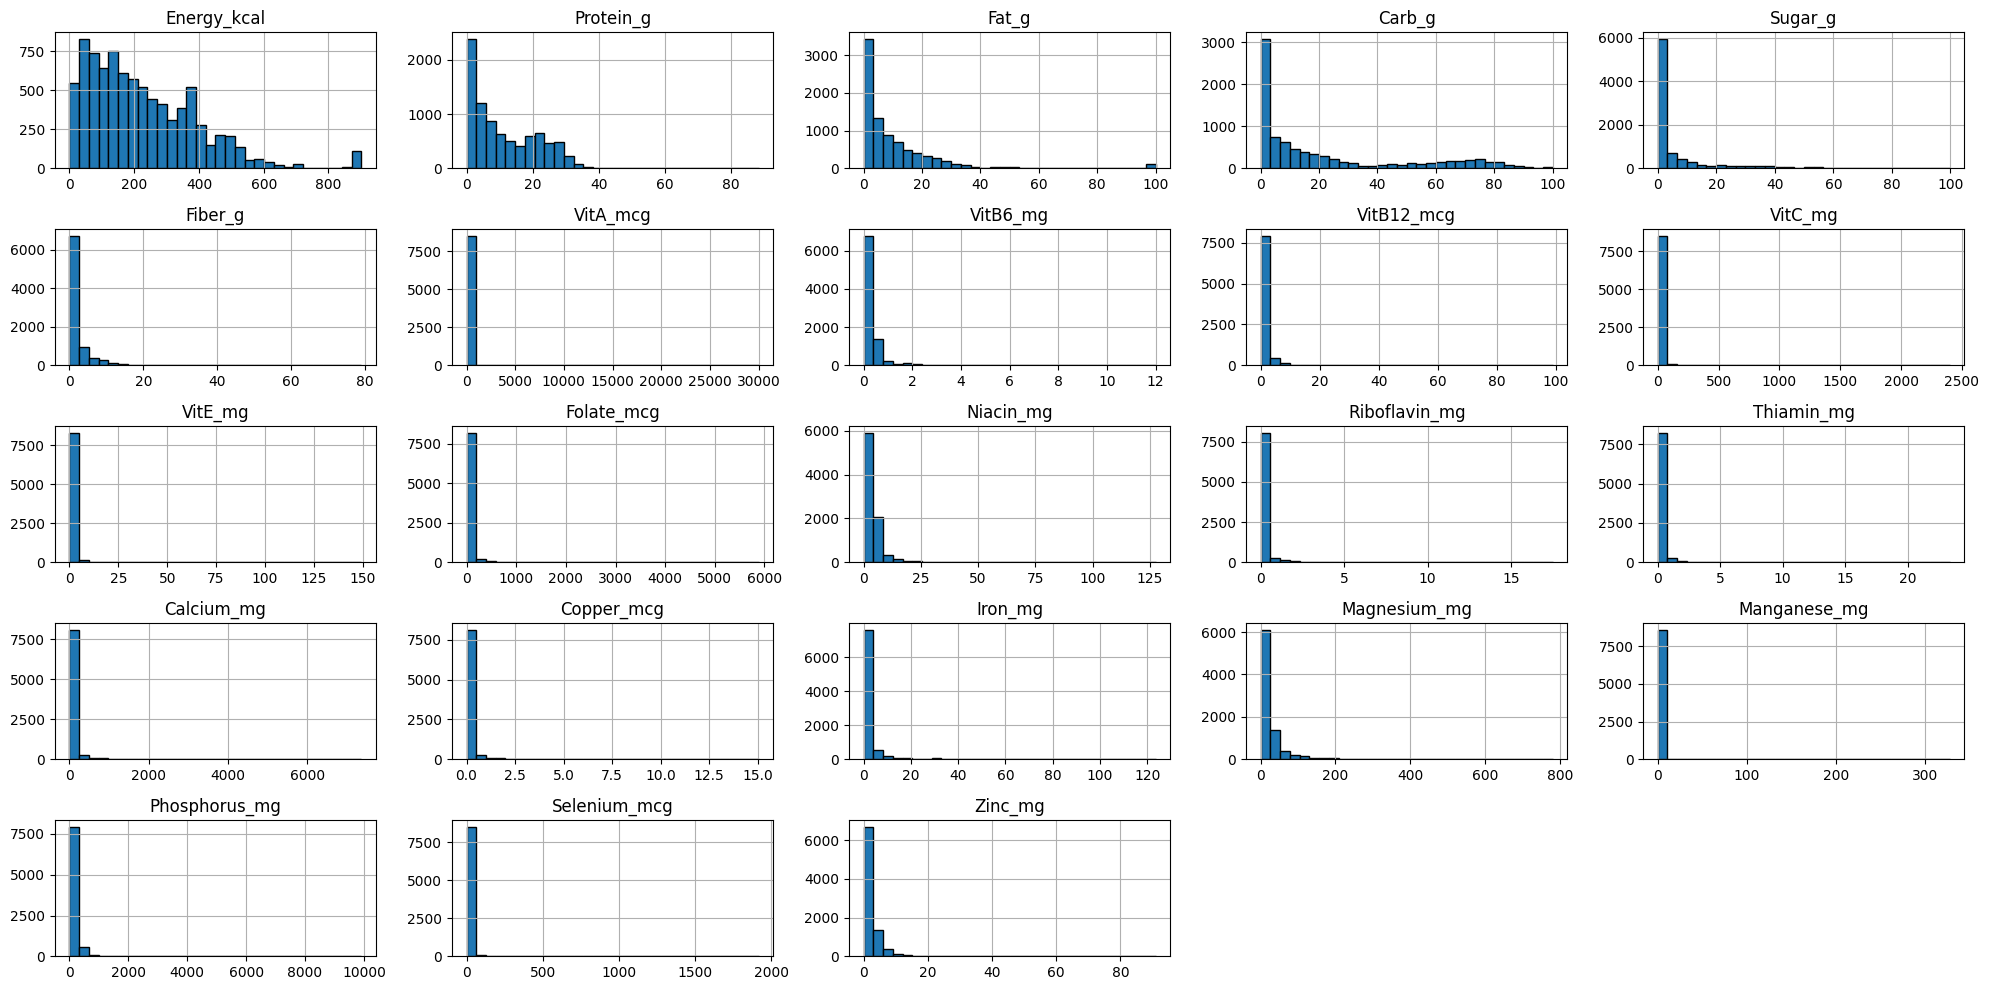

In [106]:
df.hist(bins=30, figsize=(20,10), edgecolor='black')
plt.tight_layout();

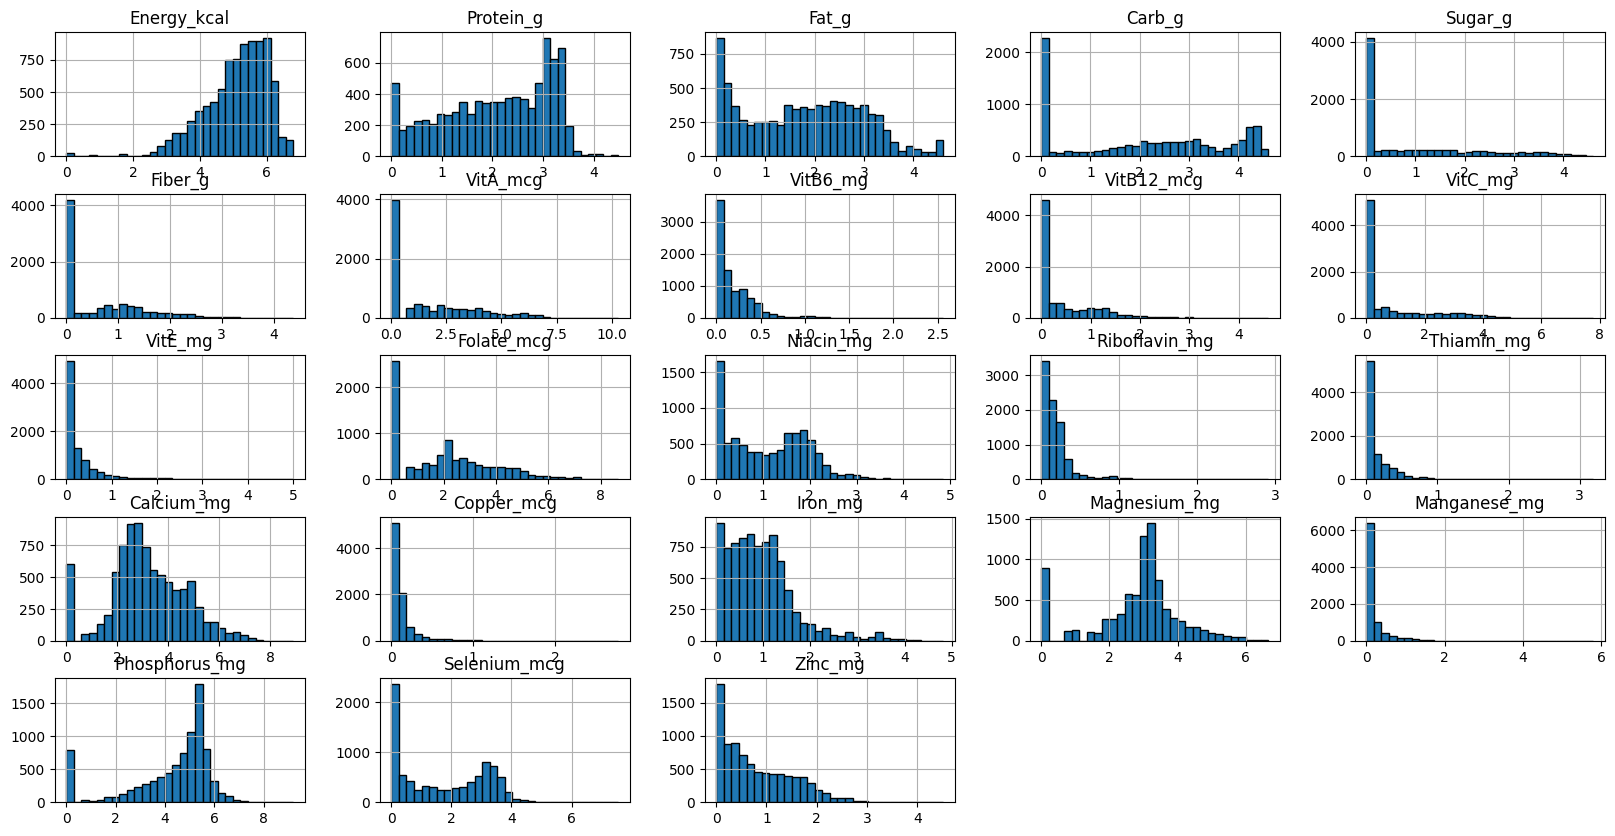

In [107]:
df_log = df.apply(np.log1p)
df_log.hist(bins=30, figsize=(20,10), edgecolor='black');

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_log_scal = scaler.fit_transform(df_log)

df_log_scal

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

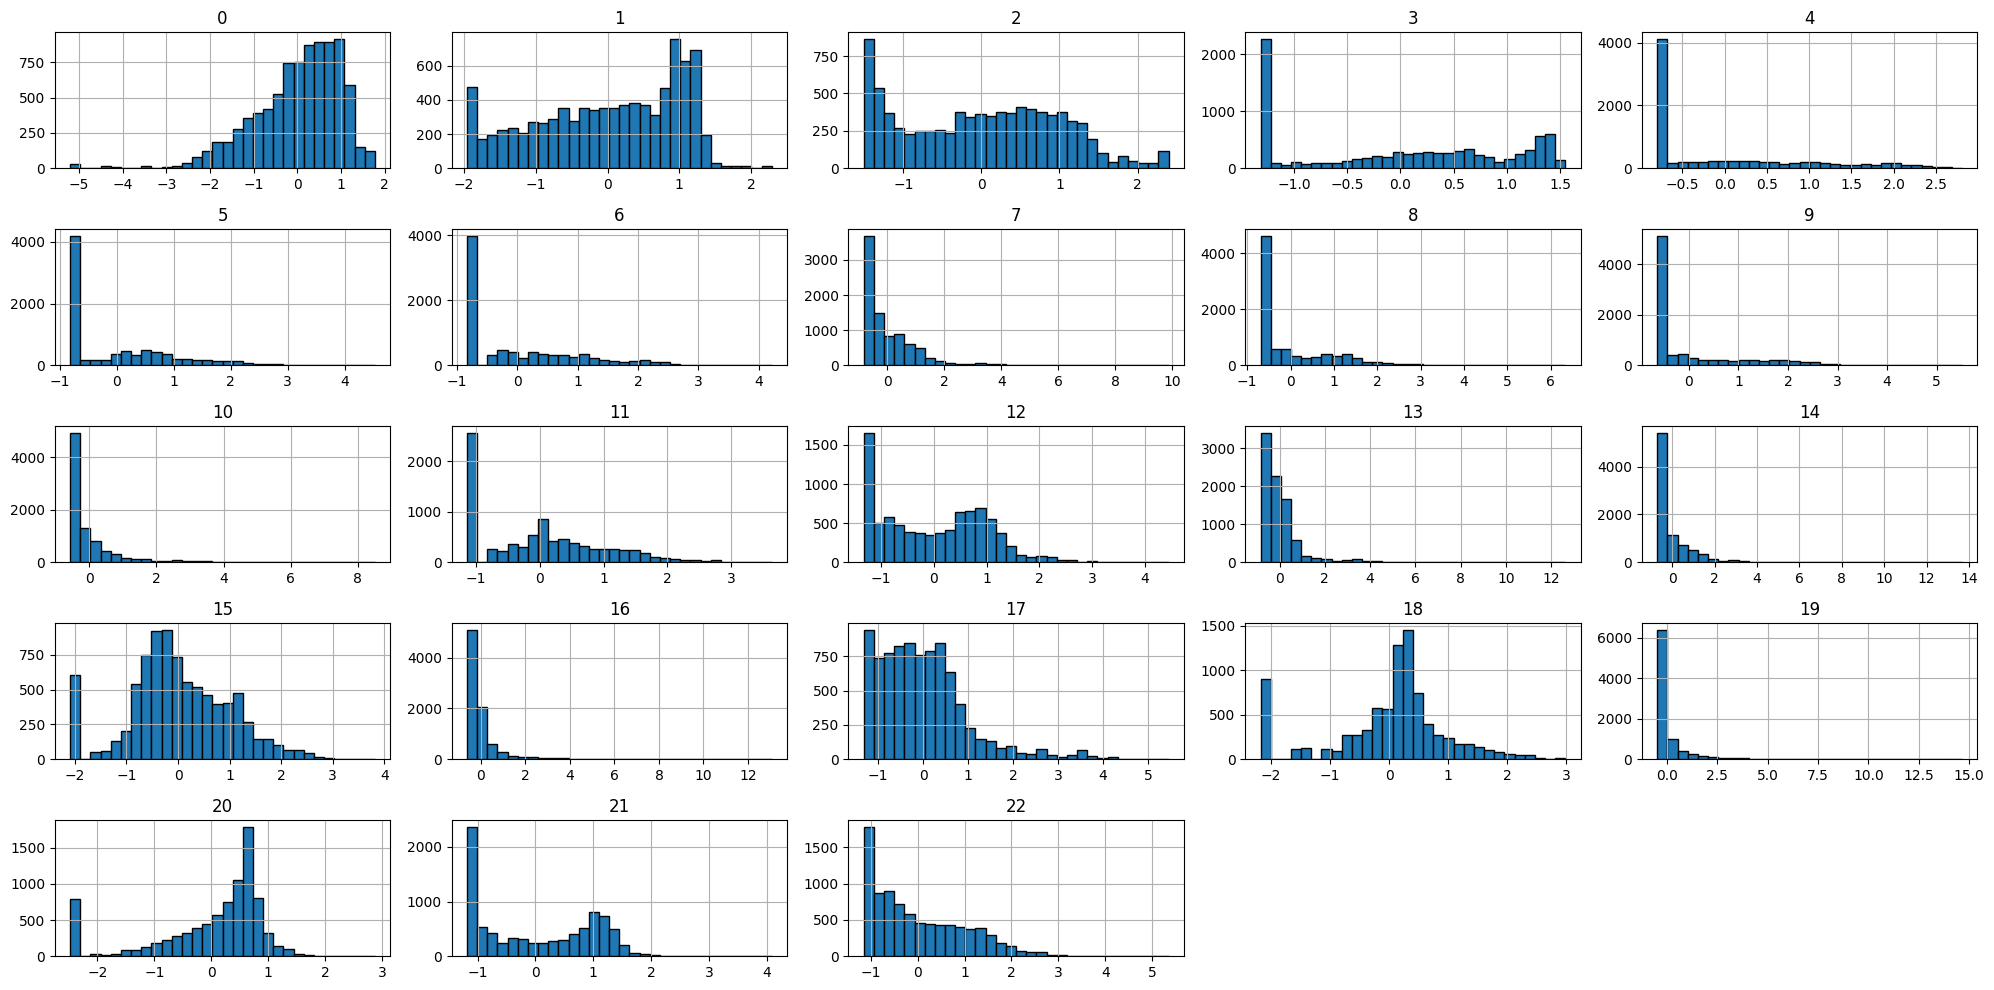

In [109]:
df_log_scal_df = pd.DataFrame(df_log_scal)

df_log_scal_df.hist(bins=30, figsize=(20,10), edgecolor='black');
plt.tight_layout()

### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [110]:
df_log_scal.shape

(8618, 23)

In [111]:
# INSTANCIAMOS PCA
modelo_pca = PCA(23)
modelo_pca.fit(df_log_scal)

PCA(n_components=23)

In [112]:
modelo_pca.components_.shape

(23, 23)

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [113]:
pd.DataFrame(
    data    = modelo_pca.components_,                               # En components están los autovectores es decir los coeficientes de la PCA
    columns = df_log.columns,                                       # El 'df_log', porque 'df_log_scal' es un array de numpy y no tiene nombre de columnas
    index   = [f'PC{i}' for i in range(1,len(df_log.columns)+1)])   # En ingles pasamos de CP a PC :-) (Principal component)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC2,0.005434,-0.242246,-0.150170,0.439120,0.320255,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
PC3,0.522265,0.079023,0.473911,0.210881,0.184202,0.136179,-0.292311,-0.159116,-0.185990,-0.394600,...,-0.096958,0.057955,-0.093723,-0.040051,0.039002,-0.073287,0.029160,-0.016400,-0.062524,-0.039190
PC4,0.064251,-0.132056,0.032874,0.038051,0.281229,-0.081251,0.086504,0.312399,0.232704,0.153351,...,0.352801,0.307120,-0.208702,-0.270591,0.124226,-0.319855,-0.327222,-0.230474,-0.164419,-0.026426
PC5,0.148431,-0.074988,0.335097,-0.094996,0.089666,-0.196324,0.544616,-0.071754,0.078367,0.127914,...,-0.046883,-0.220295,0.212893,0.008586,-0.181673,-0.044502,-0.074241,0.010867,0.095435,-0.052027
PC6,-0.056377,-0.130078,0.031900,-0.195738,-0.232627,0.056819,-0.220996,0.151959,0.055321,0.104925,...,-0.032598,-0.001320,-0.440449,0.404956,0.041904,-0.096259,0.353709,-0.273709,-0.079276,0.095311
PC7,0.056439,0.006583,0.061057,0.057248,0.124189,-0.158187,0.188459,-0.218884,0.294178,-0.082043,...,0.225303,-0.113935,0.111275,0.569171,0.176256,-0.217741,0.099441,-0.148707,-0.125677,0.076144
PC8,-0.006633,0.043613,-0.090748,-0.000223,0.484500,0.066867,-0.381964,0.084649,0.247129,0.302244,...,-0.196122,-0.395320,0.056744,0.055444,-0.003136,0.191494,-0.196760,0.103840,-0.009711,0.317642
PC9,-0.056684,0.127038,0.172536,-0.178933,-0.382132,0.168389,-0.041751,0.105078,-0.071421,0.227712,...,-0.029489,0.049271,0.489771,-0.135641,0.204857,-0.019208,0.041856,-0.019741,-0.397578,0.045342
PC10,0.295080,0.017928,0.318727,0.035122,-0.210174,-0.101103,-0.080107,-0.183531,-0.065568,0.639078,...,-0.088774,-0.001610,-0.233598,0.020123,0.103469,0.016090,-0.165279,0.021910,-0.085098,-0.002007


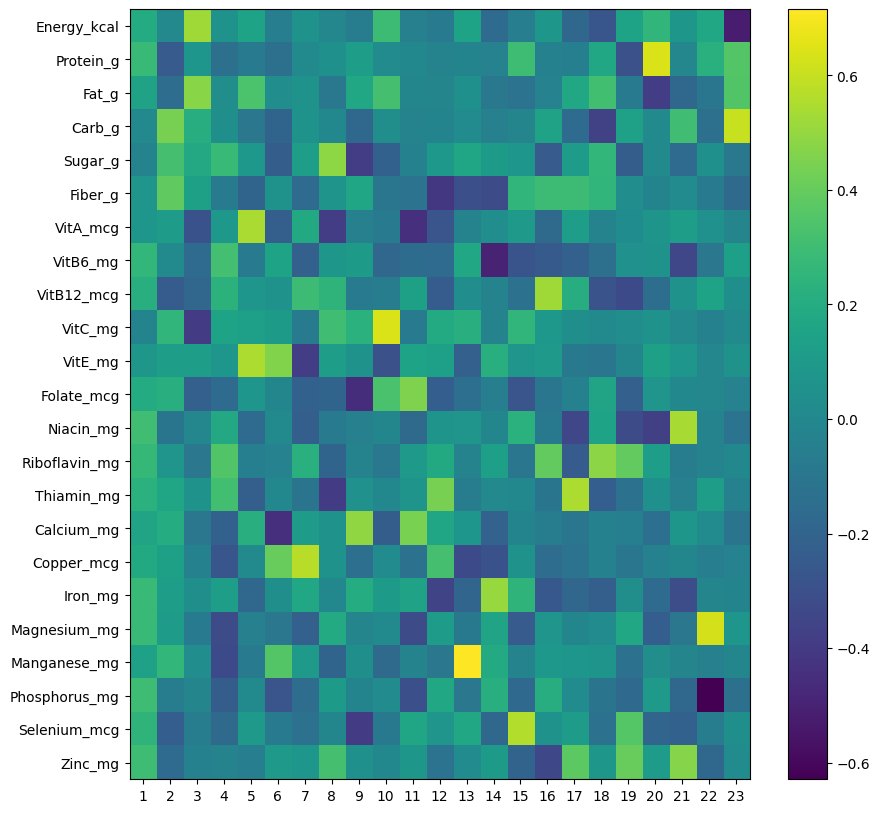

In [114]:
# Como Heatmap
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_log.columns)), df_log.columns)
plt.xticks(range(len(df_log.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


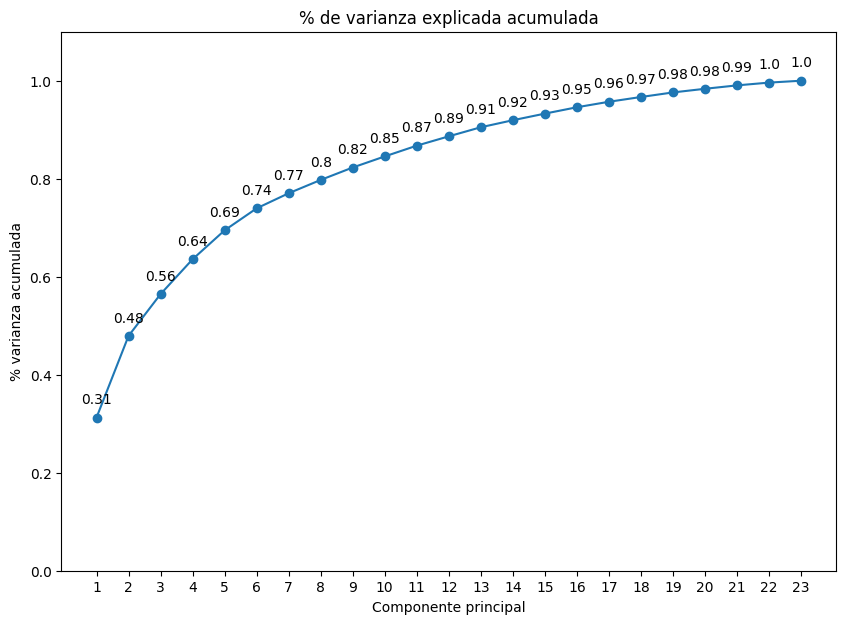

In [115]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ax.plot(
    np.arange(len(df_log.columns)) + 1,
    prop_varianza_acum,
    marker = 'o')

for x, y in zip(np.arange(len(df_log.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('% de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('% varianza acumulada');


In [116]:
prop_varianza_acum[5]

0.7395389215549495

Para un 70-75% de varianza explicada, nos quedamos con 6 componentes

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [117]:
pca_6 = PCA(n_components=6)
pca_6.fit(df_log_scal)
df_pca = pca_6.transform(df_log_scal)

In [118]:
pca_6.components_.shape     # Forma del dataset

(6, 23)

In [119]:
modelo_pca.explained_variance_     # % de cada componente en el poder informativo sobre dataset original

array([7.18858937, 3.83374047, 1.9626382 , 1.63589015, 1.35819967,
       1.03231127, 0.70837049, 0.62536385, 0.58366083, 0.52038727,
       0.50482228, 0.43827317, 0.42615271, 0.32951884, 0.3104666 ,
       0.29854271, 0.25769498, 0.22415104, 0.21382194, 0.17182004,
       0.15963602, 0.13025079, 0.08836646])

In [122]:
pd.DataFrame(data = df_pca, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968019,1.463988,0.270872,4.066991,0.307222
1,-2.106485,-0.909501,1.480580,0.263240,4.032459,0.348613
2,-3.267830,-1.138430,2.042335,1.175421,4.071722,1.326607
3,1.525964,-1.264102,-0.136013,-0.929808,2.430444,-2.095054
4,1.240712,-1.204120,-0.004729,-1.192002,2.691725,-2.341876
...,...,...,...,...,...,...
8613,2.553661,-2.548700,-0.472185,-0.109428,2.716513,0.018570
8614,0.075018,-1.840922,-0.935725,-1.348908,-0.392092,-0.759672
8615,-2.930529,1.664405,1.242070,1.172396,-0.915550,-0.885902
8616,1.118895,-0.780834,-0.805126,-1.581838,1.641702,1.090002
